In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt
import scipy.stats as stats

print('Initialized')

Initialized


# Create Data Frames

In [2]:
apps = pd.read_csv('application_record.csv')
report = pd.read_csv('credit_record.csv')

apps.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [3]:
report.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


# Explore Report

In [4]:
(abs(report[['MONTHS_BALANCE', 'ID']].groupby('ID').min())).describe()

,MONTHS_BALANCE
count,45985.000000
mean,26.433489
std,16.481280
min,0.000000
25%,12.000000
50%,25.000000
75%,40.000000
max,60.000000


In [5]:
report['STATUS'] = report['STATUS'].replace({'0':'0-29', '1':'30-59', '2':'60-89', '3':'90-119', '4':'120-149', '5':'Bad Debt/Write Off', 'C':'Paid Off', 'X':'No Debt'})

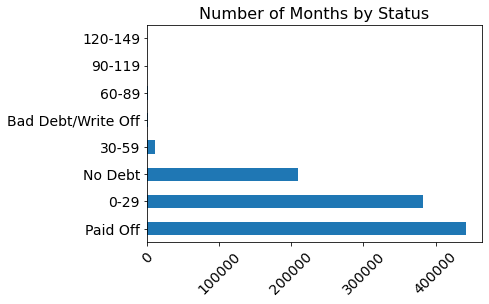

In [6]:
report['STATUS'].value_counts().plot(kind='barh')
plt.title('Number of Months by Status', fontsize=16)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=45)
plt.show()

In [7]:
report.groupby(['ID', 'STATUS']).size().unstack(fill_value=0).describe()

STATUS,0-29,120-149,30-59,60-89,90-119,Bad Debt/Write Off,No Debt,Paid Off
count,45985.000000,45985.000000,45985.000000,45985.000000,45985.000000,45985.000000,45985.000000,45985.000000
mean,8.331412,0.004849,0.241166,0.018876,0.006959,0.036816,4.549962,9.612504
std,8.234128,0.084188,0.990994,0.197607,0.101931,0.855981,9.622719,13.625156
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,16.000000
max,61.000000,7.000000,38.000000,8.000000,8.000000,48.000000,61.000000,60.000000


In [8]:
report.groupby(['ID', 'STATUS']).size().unstack()

STATUS,0-29,120-149,30-59,60-89,90-119,Bad Debt/Write Off,No Debt,Paid Off
ID,,,,,,,,
5001711,3.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN
5001712,10.0,NaN,NaN,NaN,NaN,NaN,NaN,9.0
5001713,NaN,NaN,NaN,NaN,NaN,NaN,22.0,NaN
5001714,NaN,NaN,NaN,NaN,NaN,NaN,15.0,NaN
5001715,NaN,NaN,NaN,NaN,NaN,NaN,60.0,NaN
...,...,...,...,...,...,...,...,...
5150482,12.0,NaN,NaN,NaN,NaN,NaN,NaN,6.0
5150483,NaN,NaN,NaN,NaN,NaN,NaN,18.0,NaN
5150484,12.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0


# Explore Apps

In [9]:
apps.columns

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS'],
      dtype='object')

In [10]:
columns = ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
           'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE']

for col in columns:
    print(f"{col} Counts")
    print(apps[col].value_counts())
    print('\n')

CODE_GENDER Counts
F    294440
M    144117
Name: CODE_GENDER, dtype: int64


FLAG_OWN_CAR Counts
N    275459
Y    163098
Name: FLAG_OWN_CAR, dtype: int64


FLAG_OWN_REALTY Counts
Y    304074
N    134483
Name: FLAG_OWN_REALTY, dtype: int64


CNT_CHILDREN Counts
0     304071
1      88527
2      39884
3       5430
4        486
5        133
7          9
9          5
12         4
6          4
14         3
19         1
Name: CNT_CHILDREN, dtype: int64


NAME_INCOME_TYPE Counts
Working                 226104
Commercial associate    100757
Pensioner                75493
State servant            36186
Student                     17
Name: NAME_INCOME_TYPE, dtype: int64


NAME_EDUCATION_TYPE Counts
Secondary / secondary special    301821
Higher education                 117522
Incomplete higher                 14851
Lower secondary                    4051
Academic degree                     312
Name: NAME_EDUCATION_TYPE, dtype: int64


NAME_FAMILY_STATUS Counts
Married                 299828
Sing

In [11]:
apps.isnull().sum()

ID                          0
CODE_GENDER                 0
FLAG_OWN_CAR                0
FLAG_OWN_REALTY             0
CNT_CHILDREN                0
AMT_INCOME_TOTAL            0
NAME_INCOME_TYPE            0
NAME_EDUCATION_TYPE         0
NAME_FAMILY_STATUS          0
NAME_HOUSING_TYPE           0
DAYS_BIRTH                  0
DAYS_EMPLOYED               0
FLAG_MOBIL                  0
FLAG_WORK_PHONE             0
FLAG_PHONE                  0
FLAG_EMAIL                  0
OCCUPATION_TYPE        134203
CNT_FAM_MEMBERS             0
dtype: int64

In [12]:
# Occupation type is null but employed

apps[(apps['OCCUPATION_TYPE'].isnull()) & (apps['NAME_INCOME_TYPE'] == 'Working')][['OCCUPATION_TYPE', 'NAME_INCOME_TYPE', 'DAYS_EMPLOYED']]

,OCCUPATION_TYPE,NAME_INCOME_TYPE,DAYS_EMPLOYED
0,NaN,Working,-4542
1,NaN,Working,-4542
24,NaN,Working,-1620
25,NaN,Working,-1620
26,NaN,Working,-1620
...,...,...,...
438516,NaN,Working,-5244
438517,NaN,Working,-5244
438518,NaN,Working,-5244
438542,NaN,Working,-2614


In [34]:
# Is there anyone who's occupation is null, income type is working, AND Days Employed is > -1
apps[(apps['OCCUPATION_TYPE'].isnull()) & (apps['NAME_INCOME_TYPE'].notnull()) & (apps['DAYS_EMPLOYED'] > -1)][['OCCUPATION_TYPE', 'NAME_INCOME_TYPE', 'DAYS_EMPLOYED']]

,OCCUPATION_TYPE,NAME_INCOME_TYPE,DAYS_EMPLOYED


In [14]:
apps[apps['NAME_INCOME_TYPE']=='Working']

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
10,5008815,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,-16872,-769,1,1,1,1,Accountants,2.0
11,5112956,M,Y,Y,0,270000.0,Working,Higher education,Married,House / apartment,-16872,-769,1,1,1,1,Accountants,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438542,6837905,M,Y,Y,1,355050.0,Working,Secondary / secondary special,Married,House / apartment,-15904,-2614,1,0,0,0,NaN,3.0
438543,6837906,M,Y,Y,1,355050.0,Working,Secondary / secondary special,Married,House / apartment,-15904,-2614,1,0,0,0,NaN,3.0
438548,6839936,M,Y,Y,1,135000.0,Working,Secondary / secondary special,Married,House / apartment,-12569,-2095,1,0,0,0,Laborers,3.0
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0


In [15]:
apps[(apps['OCCUPATION_TYPE'].isnull()) & (apps['NAME_INCOME_TYPE'] == 'Working')][['OCCUPATION_TYPE', 'NAME_INCOME_TYPE']]

,OCCUPATION_TYPE,NAME_INCOME_TYPE
0,NaN,Working
1,NaN,Working
24,NaN,Working
25,NaN,Working
26,NaN,Working
...,...,...
438516,NaN,Working
438517,NaN,Working
438518,NaN,Working
438542,NaN,Working


In [23]:
apps.loc[(apps['OCCUPATION_TYPE'].isnull()) & (apps['NAME_INCOME_TYPE'] == 'Working'), 'OCCUPATION_TYPE'] = 'Other'  
apps['OCCUPATION_TYPE']

0                  Other
1                  Other
2         Security staff
3            Sales staff
4            Sales staff
               ...      
438552               NaN
438553          Laborers
438554       Sales staff
438555               NaN
438556       Sales staff
Name: OCCUPATION_TYPE, Length: 438557, dtype: object

In [24]:
apps['NAME_INCOME_TYPE'].unique()

array(['Working', 'Commercial associate', 'Pensioner', 'State servant',
       'Student'], dtype=object)

In [25]:
apps.loc[(apps['OCCUPATION_TYPE'].isnull()) & (apps['NAME_INCOME_TYPE'] == 'Pensioner'), 'OCCUPATION_TYPE'] = 'Pension'
apps['OCCUPATION_TYPE']


0                  Other
1                  Other
2         Security staff
3            Sales staff
4            Sales staff
               ...      
438552           Pension
438553          Laborers
438554       Sales staff
438555           Pension
438556       Sales staff
Name: OCCUPATION_TYPE, Length: 438557, dtype: object

In [26]:
apps['OCCUPATION_TYPE'].isnull().sum()

22960

In [30]:
apps.loc[(apps['OCCUPATION_TYPE'].isnull()) & (apps['NAME_INCOME_TYPE'] == 'State servant'), 'OCCUPATION_TYPE'] = 'State'
apps['OCCUPATION_TYPE'].isnull().sum()

16750

In [32]:
apps.loc[(apps['OCCUPATION_TYPE'].isnull()) & (apps['NAME_INCOME_TYPE'].notnull())]

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,tofill
284,5009116,F,N,N,0,157500.0,Commercial associate,Higher education,Separated,With parents,-15737,-432,1,0,0,0,NaN,1.0,False
285,5009117,F,N,N,0,157500.0,Commercial associate,Higher education,Separated,With parents,-15737,-432,1,0,0,0,NaN,1.0,False
286,5009118,F,N,N,0,157500.0,Commercial associate,Higher education,Separated,With parents,-15737,-432,1,0,0,0,NaN,1.0,False
287,5009120,F,N,N,0,157500.0,Commercial associate,Higher education,Separated,With parents,-15737,-432,1,0,0,0,NaN,1.0,False
288,5009122,F,N,N,0,157500.0,Commercial associate,Higher education,Separated,With parents,-15737,-432,1,0,0,0,NaN,1.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438250,6692607,F,N,Y,0,90000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-21902,-7308,1,0,0,0,NaN,2.0,False
438321,6731993,F,N,Y,1,202500.0,Commercial associate,Higher education,Married,House / apartment,-12568,-2068,1,0,0,1,NaN,3.0,False
438446,6798618,F,N,N,0,135000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-11591,-129,1,0,0,0,NaN,2.0,False
438484,6815297,F,N,Y,0,126000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-20884,-2483,1,0,0,0,NaN,1.0,False


In [38]:
apps[['OCCUPATION_TYPE', 'DAYS_EMPLOYED', 'NAME_INCOME_TYPE']].groupby(['OCCUPATION_TYPE', 'NAME_INCOME_TYPE']).agg('mean')

DAYS_EMPLOYED
OCCUPATION_TYPE      NAME_INCOME_TYPE                   
Accountants          Commercial associate   -2326.339191
                     Pensioner              -1337.000000
                     State servant          -3492.510744
                     Working                -2591.955760
Cleaning staff       Commercial associate   -2291.509370
...                                                  ...
Security staff       Working                -2068.631986
State                State servant          -3532.579388
Waiters/barmen staff Commercial associate   -2187.288462
                     State servant          -1856.600000
                     Working                -2170.291866

[71 rows x 1 columns]